In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

data_dir = "/content/gdrive/MyDrive/Dataset of Tuberculosis Chest X-rays Images"
print("Contents of dataset folder:", os.listdir(data_dir))

Contents of dataset folder: ['TB Chest X-rays', 'Normal Chest X-rays', 'tb_detection_model.h5']


In [3]:
# Imports
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Preprocess image using CLAHE and Gaussian Blur
def preprocess_image_cv2(img_path, size=(128, 128)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)

    # Apply Gaussian Blur
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Normalize to [0, 1]
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img


In [5]:
import os
import numpy as np

# Preprocessing function using cv2 (as before)
def preprocess_image_cv2(img_path, size=(128, 128)):
    import cv2
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img = clahe.apply(img)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    return img

# ✅ Updated load_data with your actual folder names
def load_data(data_dir):
    images = []
    labels = []

    tb_dir = os.path.join(data_dir, 'TB Chest X-rays')
    normal_dir = os.path.join(data_dir, 'Normal Chest X-rays')

    for img_name in os.listdir(tb_dir):
        img_path = os.path.join(tb_dir, img_name)
        img = preprocess_image_cv2(img_path)
        images.append(img)
        labels.append(1)  # TB class

    for img_name in os.listdir(normal_dir):
        img_path = os.path.join(normal_dir, img_name)
        img = preprocess_image_cv2(img_path)
        images.append(img)
        labels.append(0)  # Normal class

    return np.array(images), np.array(labels)

# ✅ Set correct data directory
data_dir = "/content/gdrive/MyDrive/Dataset of Tuberculosis Chest X-rays Images"

# Load data
images, labels = load_data(data_dir)


In [6]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [7]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 63s 797ms/step - accuracy: 0.8259 - loss: 0.6403 - val_accuracy: 0.9719 - val_loss: 0.1144
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 61s 802ms/step - accuracy: 0.9593 - loss: 0.0917 - val_accuracy: 0.9868 - val_loss: 0.0573
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 61s 805ms/step - accuracy: 0.9778 - loss: 0.0775 - val_accuracy: 0.9917 - val_loss: 0.0404
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 59s 784ms/step - accuracy: 0.9856 - loss: 0.0738 - val_accuracy: 0.9868 - val_loss: 0.0497
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 826ms/step - accuracy: 0.9806 - loss: 0.0695 - val_accuracy: 0.9917 - val_loss: 0.0281
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 776ms/step - accuracy: 0.9883 - loss: 0.0679 - val_accuracy: 0.9917 - val_loss: 0.0281
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 804ms/step - accuracy: 0.9902 - loss: 0.0585 - val_accuracy: 0.9901 - val_loss: 0.0239
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 775ms/step - accuracy: 0.9967 - loss: 0.0537 - val_accu

In [10]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9905 - loss: 0.0208
Test Accuracy: 0.9901


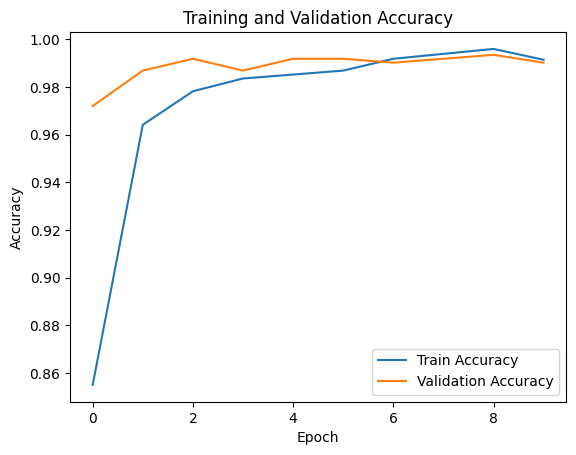

In [11]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [22]:
model_path = '/content/gdrive/MyDrive/Dataset of Tuberculosis Chest X-rays Images/tb_detection_model.h5'
model.save(model_path)
print(f"Model saved to: {model_path}")

Model saved to: /content/gdrive/MyDrive/Dataset of Tuberculosis Chest X-rays Images/tb_detection_model.h5


In [23]:
# Step 6: Load the saved model and make predictions
loaded_model = tf.keras.models.load_model(model_path)

In [24]:
# Function to check a single X-ray image
def check_tb_xray(image_path):
    img = preprocess_image_cv2(image_path)
    img = np.expand_dims(img, axis=0)  # Batch dimension
    prediction = loaded_model.predict(img)
    return 'TB Detected' if prediction[0] > 0.5 else 'Normal'

In [29]:
# Upload test image from local machine
uploaded = files.upload()

Saving TB.4.jpg to TB.4 (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Result for TB.4 (1).jpg: TB Detected


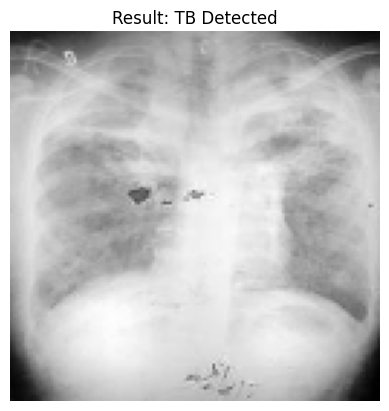

In [30]:
for test_image_path in uploaded.keys():
    result = check_tb_xray(test_image_path)
    print(f'Result for {test_image_path}: {result}')

    # Display image
    img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(128, 128), color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.title(f'Result: {result}')
    plt.axis('off')
    plt.show()